# Endpoint Closing Analytics Challenge
_by Adrian Lechter (interview candidate - Q3 2020)_

The goal of this notebook is to perform relevant data analysis that will populate my final presentation. This notebook is broken out into the following stages:

- **Import libraries and datasets** - This is standard Data Science procedure; I'm basically just making sure I have all the tools and data at hand to perform my analyses.
- **Data Investigation and Feature Engineering** - Here, I begin digging into the data to better understand what cleanup work will be required before performing my analyses.
- **Key questions to Answer and Analysis** - Here, I identify the key questions I'd like to answer with the data and then perform the actual data analysis.

To more clearly follow my logic, data manipulation and data visualization, I encourage you to view the comments I left within the cells. Happy Friday!

### Import libraries and datasets

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pandasql import sqldf
from mpl_toolkits import mplot3d

#Allow for in-notebook displays
%matplotlib inline

#Activating pandasql to run queries at the end of the notebook
pysqldf = lambda q: sqldf(q, globals())

In [2]:
#Ingest data
con = sqlite3.connect('data_analyst_challenge_data.sqlite')
df_users = pd.read_sql_query("Select * from users", con)
df_tasks = pd.read_sql_query("Select * from tasks", con)
df_roles = pd.read_sql_query("Select * from roles", con)
df_transactions = pd.read_sql_query("Select * from transactions", con)


#Preview data
display('users table')
display(df_users.head())
display(df_users.info())
display('tasks table')
display(df_tasks.head())
display(df_tasks.info())
display('roles table')
display(df_roles.head())
display(df_roles.info())
display('transactions table')
display(df_transactions.head())
display(df_transactions.info())

'users table'

,enotifications,onboarded,phone_verified,email_notifications,create_time,id
0,true,NaN,NaN,NaN,None,a3020dcb-185d-4547-a082-0273efa80e08
1,true,NaN,NaN,NaN,None,a3020dcb-185d-4547-a082-0273efa80e08
2,true,NaN,NaN,NaN,None,a3020dcb-185d-4547-a082-0273efa80e08
3,true,NaN,NaN,NaN,None,a3020dcb-185d-4547-a082-0273efa80e08
4,true,NaN,NaN,NaN,None,a3020dcb-185d-4547-a082-0273efa80e08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 6 columns):
enotifications         5623 non-null object
onboarded              3013 non-null float64
phone_verified         2889 non-null float64
email_notifications    2890 non-null float64
create_time            2890 non-null object
id                     9328 non-null object
dtypes: float64(3), object(3)
memory usage: 437.4+ KB


None

'tasks table'

,transaction_id,assignee,name,priority,status,task_id,task_type,createtime,completed,due_date,sync,type,generic
0,7eea58f7-ffed-4384-85b1-0f773a5d55dc,7ecc2520-f78f-4599-8bfa-3ec5988fd7a4,Seller Personal Property,false,To-Do,c142da18-9a5e-49d2-a7ec-72ed622a929c,sellerPersonalProperty,1536626848,0,1536626848,,Questions,False
1,9b54a8ca-2419-4ad8-8e73-988a1e67503d,3ea6f1b1-3837-4cae-a8d9-606d1636f76f,Lender Information,false,Completed,b32e1441-f61a-414a-9308-88315bbd7a80,s_lender,1537133132,1537133890,1538092800,,Questions,False
2,9b54a8ca-2419-4ad8-8e73-988a1e67503d,3ea6f1b1-3837-4cae-a8d9-606d1636f76f,Seller Liens Bonds,false,Completed,cf64d376-5b84-45f1-a76b-dc125a7bdffb,sellerLiensBonds,1537128196,1537132517,1537128196,,Questions,False
3,63242b80-0a22-4eec-9190-399b1e814fec,10ddf68a-7069-4a75-81fa-690e34c51865,Personal & Property Info,false,Completed,a55d5a7f-fabb-46c1-afec-bf90d8a00011,b_personal_single,1562000076,1562000114,1562328000,v,Questions,False
4,63242b80-0a22-4eec-9190-399b1e814fec,42d207b1-c40d-4f37-a6e6-9038d340b602,Schedule Signing Appointment,true,Completed,1541f91b-3f32-43ba-b02f-ef10e581fe6c,schedule_notary,1563493383,1563576533,1563624000,s,Schedule Notary,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36801 entries, 0 to 36800
Data columns (total 13 columns):
transaction_id    36801 non-null object
assignee          36801 non-null object
name              36801 non-null object
priority          36801 non-null object
status            36801 non-null object
task_id           36801 non-null object
task_type         36801 non-null object
createtime        36801 non-null object
completed         36801 non-null object
due_date          36801 non-null object
sync              36801 non-null object
type              36801 non-null object
generic           36801 non-null object
dtypes: object(13)
memory usage: 3.7+ MB


None

'roles table'

,user_id,transaction_id,role_id,role
0,466fd7b6-d499-4bbe-98e3-40db75ba37c0,cf428543-4e04-4706-b06f-efb288dd3bf2,087a9aaf-deca-404a-899d-789fa73186d5,Buyer
1,1b9e7013-d673-4198-825f-bc6c38d8d63a,9fcdbd4d-7154-444e-9ef6-94067f72af0a,c722c5a0-1c41-43e1-8b8e-e5a749eb0587,Buyer
2,4b114dc3-1a9a-4bee-9722-bc68d3cd4d07,90ad6243-1e07-4902-b842-b16cd8be2e71,eadbb033-3e04-462a-a30d-281360bb550a,Seller
3,60302cd0-c4df-47a0-aa08-bb168556ba09,3459be61-ebb2-4d68-aaac-ea544cf1a265,a4d233b9-8653-4069-a3d7-b3ab67e62bec,Seller
4,b3bc4d1f-9302-4072-9b7b-17a0c764aa0d,7b1af11f-3879-4854-9761-8e17f8a6e9c6,9d38fc60-8841-4dce-9dc8-95c7e9b1758b,Agent


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8585 entries, 0 to 8584
Data columns (total 4 columns):
user_id           8585 non-null object
transaction_id    8585 non-null object
role_id           8585 non-null object
role              8585 non-null object
dtypes: object(4)
memory usage: 268.4+ KB


None

'transactions table'

,transaction_id,status,closed
0,e01f4ef6-33c5-4460-8865-35c1ed6ef545,Cancelled,
1,3963e3e0-442d-49de-af8d-6ad0931700eb,Cancelled,
2,977b2dc1-b6e4-4837-8ad7-5387d28e4d0c,Cancelled,1561464000
3,a1232ec5-b7f4-4e63-a61c-8404c205274e,Closed,1558612800
4,a248a767-9984-4b9c-abbc-749568332b41,Closed,1547555267


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
transaction_id    1650 non-null object
status            1650 non-null object
closed            1650 non-null object
dtypes: object(3)
memory usage: 38.8+ KB


None

### Data Investigation and Feature Engineering

Before moving forward, we should get a better understanding of data quality and missingness. The aim is to have a reliable series of datasets to work with for the ensuing analyses. The following cells attempt to better understand this.

First, upon inspecting the datasets above, it appears the `df_users` dataset contains a significant amount of missing values. Let's look into this.

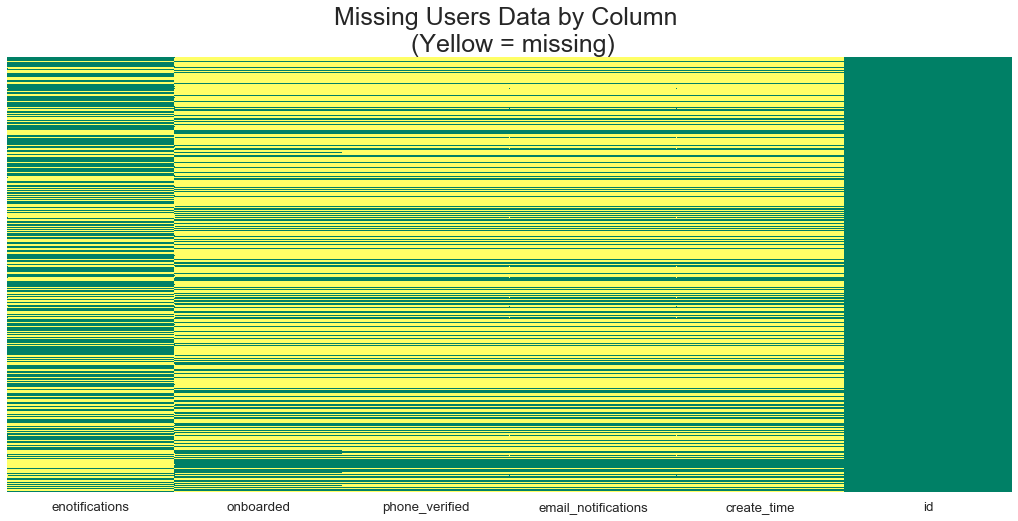

In [3]:
#df_users columns has lots of null values. Is this amount significant?
sns.set_context('paper')
plt.figure(figsize = (18,8))
sns.set(font_scale=1.2)
sns.heatmap(df_users.isnull(),
            yticklabels = False, 
            cbar = False, cmap = 'summer').set_title('Missing Users Data by Column \n (Yellow = missing)', 
                                                     fontdict = {'fontsize': 25});

The `df_users` dataset is filled with missing values. There won't be a ton of meaningful insights we'll be able to derive having so much missing data, so we'll ignore these columns for now.

The `df_tasks` table has lots of categorical variables. To get a better handle on the data, let's see what the various data look like by column.

In [4]:
#Create iteratable list of categorical columns from df_tasks
columns = ['name', 'priority', 'status', 'task_type', 'type']

for column in columns:
    display(f'Breakout for {column} column')
    display(df_tasks[column].value_counts())

'Breakout for name column'

Title Commitment Delivered                   2534
Sign Escrow Instructions                     2231
Title Product Delivered                      2096
Acknowledge Earnest Money Deposit Receipt    2035
Personal & Property Info                     2011
                                             ... 
Overnight Label for Earnest Money               1
Plat Map                                        1
shipping label for EMD                          1
Docs to Review                                  1
Final Seller CD                                 1
Name: name, Length: 936, dtype: int64

'Breakout for priority column'

false    22995
true     13806
Name: priority, dtype: int64

'Breakout for status column'

Completed            23615
Never Completed       5790
To-Do                 4592
Completed by Peer     2540
Recalled               219
Submitted by Ops        45
Name: status, dtype: int64

'Breakout for task_type column'

generic_acknowledgement        6027
all_title_commitment           4640
escrow_instructions            2287
b_lpo                          1705
schedule_notary                1642
                               ... 
seller_closing_preferencesf       1
foreign_status                    1
bs_escrow_instructions            1
s_closing_preferences             1
s_1099s_certification             1
Name: task_type, Length: 78, dtype: int64

'Breakout for type column'

NA                 27560
Acknowledge         3485
Questions           3190
e-sign              1246
Upload               480
Schedule Notary      441
EMD                  399
Name: type, dtype: int64

Some thoughts on the `df_tasks` data:
- The name column is not standardized at all. It appears there are hundreds of different values here, so this isn't going to clearly show us what the process looks to close a home. The same applies for the task_type column. We may get somewhere studying the status column though as it is the most aggregated column in this dataset to classify various tasks.
- Let's remove tasks listed with 'Completed by Peer' status. If we don't do this, we'll end up miscalculating completion rates since we'll have duplicate values.

Let's now check out the `df_transactions` dataset.

In [5]:
display('Status column value counts')
display(df_transactions['status'].value_counts())
display('Closed column value counts')
display(df_transactions['closed'].value_counts())

'Status column value counts'

Closed       521
Prelim       398
In Escrow    390
Cancelled    238
Test         103
Name: status, dtype: int64

'Closed column value counts'

0             649
               80
1546329600     18
1585656000     14
1592568000     11
             ... 
1577102400      1
1572039521      1
1563796800      1
1554984000      1
1567080000      1
Name: closed, Length: 354, dtype: int64

There is some messiness in this dataset from a closing standpoint. Some transactions with a 'Closed' status either are missing a closed timestamp or have ones that don't make sense ( _e.g. transactions closing in 2010 when Endpoint Closing is ~3 years old_ ).

---

To make this work easy to follow, let's outline our learnings from all the datasets in the SQLite file:

`df_users`
- Given how many missing values there are here, we'll have to ignore pretty much all the data here. Any conclusions drawn from the available data will be anecdotal **at best**.

`df_tasks`
- The type column is mostly null. We cannot remove it just yet as this is probably our best bet to better understand to-do completion rate falloffs (since this column aggregates the different tasks into the fewest values)
- The name and task_type columns have a massive amount of unique values. There may be useful insights in these columns, but it won't give us an understanding of what the classic flow looks like in the closing process.
- To ensure accurate metric calculation, we'll remove the 'Completed by Peer' status

`df_transactions`
- There is test data that needs to be removed (not just from this dataset but from the others too). 

Based on these bullets, we'll make adjustments to the overlying data, combine it and then begin with our data analysis phase.

In [6]:
#Remove test values from transactions dataset
df_transactions = df_transactions[(df_transactions['status'] != 'Test')]

#Remove task values with status 'Completed by Peer' to avoid miscalculating to-do completion rate
df_tasks = df_tasks[(df_tasks['status'] != 'Completed by Peer')]

#Remove all columns from df_users except id (since there are so many missing values)
df_users = df_users[['id']]

# #Remove sync and generic columns from tasks dataset because of missing values and instructions from Madhav
df_tasks = df_tasks.drop(['sync', 'generic'], axis = 1)

#Rename status column in transactions dataset to avoid confusion
df_transactions = df_transactions.rename(columns= {'status':'status_transactions'})

#Rename status column in tasks dataset to avoid confusion
df_tasks = df_tasks.rename(columns= {'status':'status_tasks'})

#Combine datasets into one. Note the double join with df_roles.
df_master = pd.merge(df_transactions,df_tasks, on = 'transaction_id', how = 'inner')
df_master = pd.merge(df_master, df_roles, left_on = ['assignee', 'transaction_id'], 
                     right_on= ['user_id', 'transaction_id'], how = 'left')

#Convert all the unix timestamps into readable ones from master dataset, we iterate here to save some time
timestamp_columns = ['closed', 'createtime', 'completed', 'due_date']

for column in timestamp_columns:
    df_master[column] = pd.to_datetime(df_master[column], unit = 's')
    df_master[column] = df_master[column].dt.strftime("%Y-%m-%d %H:%M:%S")
    
#Adding days of week for the various task timestamps to study them below
df_master['createtime_weekday'] = pd.to_datetime(df_master['createtime']).dt.dayofweek
df_master['completed_weekday'] = pd.to_datetime(df_master['completed']).dt.dayofweek
df_master['due_date_weekday'] = pd.to_datetime(df_master['due_date']).dt.dayofweek

In [7]:
#Preview the combined dataset before moving forward
display(df_master.head())
display(df_master.info())

,transaction_id,status_transactions,closed,assignee,name,priority,status_tasks,task_id,task_type,createtime,completed,due_date,type,user_id,role_id,role,createtime_weekday,completed_weekday,due_date_weekday
0,977b2dc1-b6e4-4837-8ad7-5387d28e4d0c,Cancelled,2019-06-25 12:00:00,dafc3883-eda6-4014-835e-2264a5895899,Personal & Property Info,false,Completed,69889454-72cc-4623-8a87-f7b8aef328b1,b_personal_single,2019-05-28 19:54:53,2019-05-28 20:47:22,2019-05-31 12:00:00,Questions,dafc3883-eda6-4014-835e-2264a5895899,8040b7e6-e8bd-49b8-9baf-360a387d9449,Buyer,1,1,4
1,977b2dc1-b6e4-4837-8ad7-5387d28e4d0c,Cancelled,2019-06-25 12:00:00,25a95033-168d-4474-aacd-71896eb9e11b,Personal & Property Info,true,Completed,96d1fc8e-8cea-494a-a190-48255dcb135e,s_personal_single,2019-05-28 19:54:59,2019-05-31 16:57:53,2019-05-31 12:00:00,Questions,25a95033-168d-4474-aacd-71896eb9e11b,90a3a3de-bc52-4e70-be48-045901dffdf0,Seller,1,4,4
2,977b2dc1-b6e4-4837-8ad7-5387d28e4d0c,Cancelled,2019-06-25 12:00:00,dafc3883-eda6-4014-835e-2264a5895899,Acknowledge Earnest Money Deposit Receipt,false,Completed,559f4617-a720-4efc-b050-d82d88e0bc67,generic_acknowledgement,2019-05-28 20:48:46,2019-05-29 01:11:28,2019-06-04 12:00:00,Acknowledge,dafc3883-eda6-4014-835e-2264a5895899,8040b7e6-e8bd-49b8-9baf-360a387d9449,Buyer,1,2,1
3,977b2dc1-b6e4-4837-8ad7-5387d28e4d0c,Cancelled,2019-06-25 12:00:00,33b29070-5fab-4d02-bdf8-739afa9945c9,Title Commitment Delivered,true,Never Completed,6f16edbf-a3c4-4f9e-b414-acbbef2ca920,all_title_commitment,2019-05-29 15:50:29,1970-01-01 00:00:00,2019-06-04 12:00:00,Acknowledge,33b29070-5fab-4d02-bdf8-739afa9945c9,f7be60f1-46c9-4b88-b226-c0239b558bb7,Agent,2,3,1
4,977b2dc1-b6e4-4837-8ad7-5387d28e4d0c,Cancelled,2019-06-25 12:00:00,182e3149-17bb-497e-87b4-4b60e8546b32,Acknowledge Earnest Money Deposit Receipt,false,Completed,e55db42f-c628-47c8-8d60-f58de9a2e815,generic_acknowledgement,2019-05-28 20:48:47,2019-05-28 20:50:26,2019-06-04 12:00:00,Acknowledge,182e3149-17bb-497e-87b4-4b60e8546b32,3205f944-62a1-4789-bb9e-0fb5588d2858,Agent,1,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33466 entries, 0 to 33465
Data columns (total 19 columns):
transaction_id         33466 non-null object
status_transactions    33466 non-null object
closed                 33466 non-null object
assignee               33466 non-null object
name                   33466 non-null object
priority               33466 non-null object
status_tasks           33466 non-null object
task_id                33466 non-null object
task_type              33466 non-null object
createtime             33466 non-null object
completed              33466 non-null object
due_date               33466 non-null object
type                   33466 non-null object
user_id                33342 non-null object
role_id                33342 non-null object
role                   33342 non-null object
createtime_weekday     33466 non-null int64
completed_weekday      33466 non-null int64
due_date_weekday       33466 non-null int64
dtypes: int64(3), object(16)
memory usa

None

### Key questions to Answer and Analysis

Now that we've cleaned up our data, let's begin deriving actionable insights to improve the to-do completion rate. Going forward, I assume to-do completion rate is calculated by taking the tasks with 'Completed' status and dividing them by all tasks. In doing this, we get the % of completed tasks, which seems to be the aim of this metric. In my actual queries, this metric is referred to as 'completion_rate'.

I've bulleted the questions I'd like to answer below for simplicity.

- Which 'types' have the lowest to-do completion rate? What does this look like by role?
- Can we use the 'task_type' column to zoom into the type with the lowest to-do completion rate? In doing this, we'll better understand what specific operational task is causing inefficiencies.
- For closed transactions, do the ones with more tasks completed late have lower to-do completion rates?
- What kind of impact does the 'priority' column have on to-do completion rate?
- Does the time of the week in which a task is created/due have any impact on its to-do completion rate?

I will be answering these questions in the cells below in the order they were bulleted. 

In [8]:
#What is the overall to-do completion rate in the dataset?
query = """

Select
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

"""

#Show results
output = pysqldf(query)
display(output)

,completion_rate
0,0.72


In [9]:
#What is the to-do completion rate breakout by role?
query = """

Select
    role,
    count(*),
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

where 1=1
    and role not like 'None'
    and role not like ' '

group by 1 

"""

#Show results
output = pysqldf(query)
display(output)

,role,count(*),completion_rate
0,Agent,8769,0.50
1,Buyer,13192,0.78
2,Seller,11371,0.81


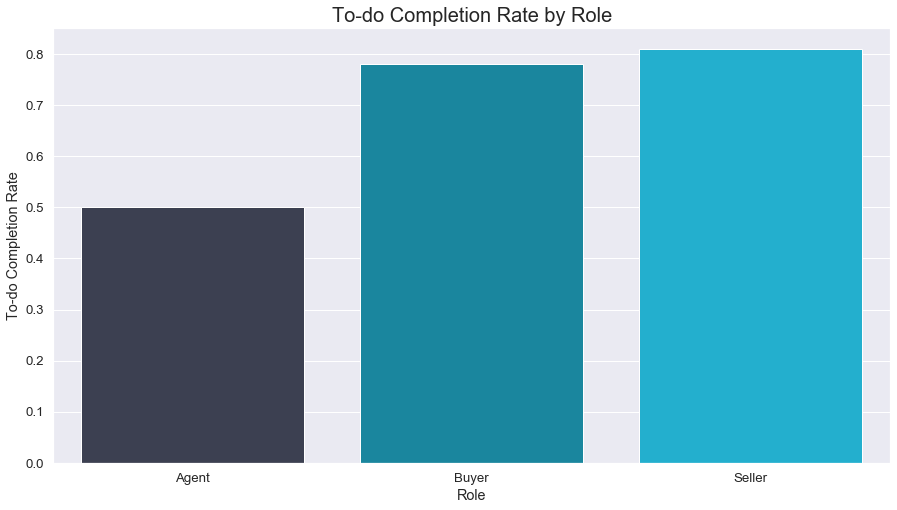

In [10]:
#Preparing the role-breakout visual here for my presentation
plt.figure(figsize = (15,8))
splot = sns.barplot(x = 'role', y = 'completion_rate', palette = ['#383e54', '#0494b4', '#07c1ea'],
            data = output).set_title('To-do Completion Rate by Role', fontdict = {'fontsize':20})
plt.ylabel('To-do Completion Rate')
plt.xlabel('Role');

In [11]:
#What type of task has the lowest completion rate?
query = """

Select
    type,
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

where 1=1
    and type not like 'NA'

group by 1

"""

#Show results
output = pysqldf(query)
display(output)

,type,completion_rate
0,Acknowledge,0.58
1,EMD,0.76
2,Questions,0.84
3,Schedule Notary,0.70
4,Upload,0.56
5,e-sign,0.87


In [12]:
#For the 'Upload' types, which task type has the lowest completion rate?
query = """

Select
    task_type,
    count(*) as total_instances,
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

where 1=1
    and type like 'Upload'

group by 1

"""

#Show results
output = pysqldf(query)
display(output)

,task_type,total_instances,completion_rate
0,add_addendums,16,0.56
1,agents_commission,195,0.57
2,death_certificate,1,1.00
3,generic_upload,165,0.53
4,trust_documents,2,1.00


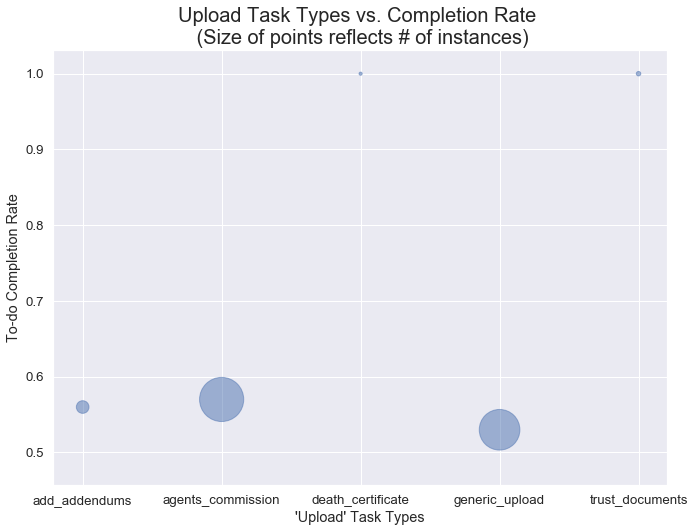

In [13]:
# Plotting these results for my presentation
plt.figure(figsize = (11,8))
x = output['task_type']
y = output['completion_rate']
z = output['total_instances']
plt.scatter(x, y, z*10, alpha=0.5)
plt.title("Upload Task Types vs. Completion Rate \n (Size of points reflects # of instances)", fontdict = {'fontsize':20})
plt.ylabel('To-do Completion Rate')
plt.xlabel("'Upload' Task Types");

plt.show()


In [14]:
#What does to-do completion rate look like broken out by role and type?
query = """

Select
    type,
    role,
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

where 1=1
    and role not like 'None'
    and role not like ' '
    and type not like 'NA'

group by 1,2

having round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) > 0

"""

#Show results
output = pysqldf(query)
display(output)

,type,role,completion_rate
0,Acknowledge,Agent,0.53
1,Acknowledge,Buyer,0.67
2,Acknowledge,Seller,0.63
3,EMD,Buyer,0.77
4,Questions,Agent,0.64
5,Questions,Buyer,0.86
6,Questions,Seller,0.88
7,Schedule Notary,Agent,1.00
8,Schedule Notary,Buyer,0.66
9,Schedule Notary,Seller,0.74


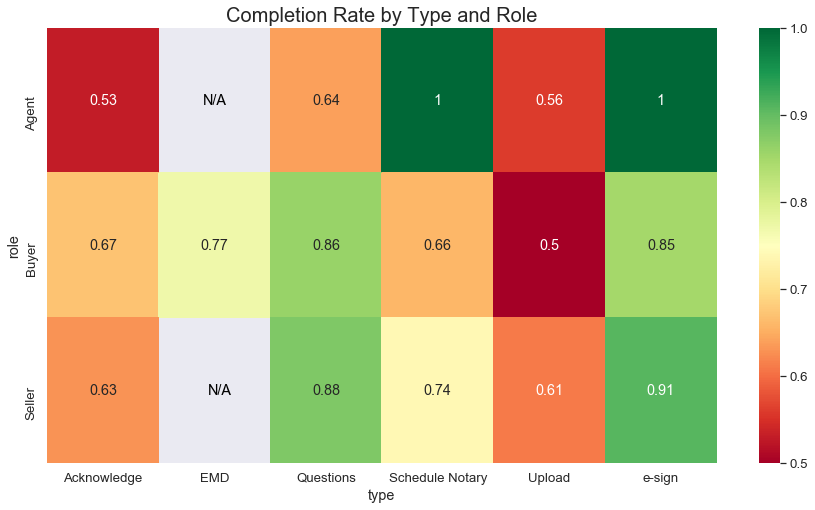

In [15]:
#Prepare heatmap visual for presentation
df_role_type_pivot = output.pivot('role', 'type', 'completion_rate')
plt.figure(figsize = (15,8))
ax = sns.heatmap(df_role_type_pivot, annot=True, cmap = 'RdYlGn').set_title('Completion Rate by Type and Role', 
                                                                           fontdict = {'fontsize':20})

plt.text(1.5,0.5,'N/A', ha = 'center', va = 'center', color = 'black')
plt.text(1.55,2.5,'N/A', ha = 'center', va = 'center', color = 'black');

In [16]:
#For closed transactions, do the ones with more tasks completed late have lower to-do completion rates?
query = """

with closed_transactions as (
	Select
		transaction_id

	from df_master

	where 1=1
		and status_transactions like 'Closed'
		and closed > '2010-01-01'
),

late_tasks as (
	Select
		transaction_id,
		sum(case when completed > due_date  and completed is not null and completed != '' and completed != ' ' then 1 else 0 end) as number_of_late_tasks

	from df_master
    
    group by 1
)

Select
	number_of_late_tasks,
    count(distinct df_master.transaction_id) as total_transactions,
	round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate

from df_master

join late_tasks
	on df_master.transaction_id = late_tasks.transaction_id

where 1=1
	and df_master.transaction_id in (Select * from closed_transactions)

group by 1

"""

#Show results
output = pysqldf(query)
display(output.head())

,number_of_late_tasks,total_transactions,completion_rate
0,0,15,0.75
1,1,12,0.67
2,2,15,0.72
3,3,29,0.78
4,4,24,0.78


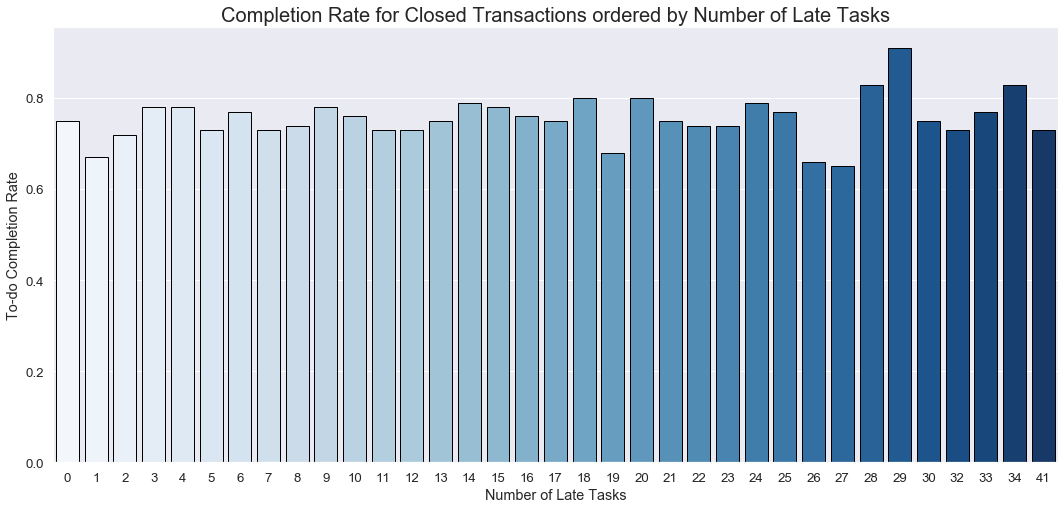

In [17]:
#Lets graph this for the presentation
plt.figure(figsize = (18,8))
sns.barplot(x = 'number_of_late_tasks', 
            y = 'completion_rate', data = output, edgecolor = 'black',
            palette= 'Blues').\
            set_title('Completion Rate for Closed Transactions ordered by Number of Late Tasks', 
                     fontdict = {'fontsize':20})
plt.ylabel('To-do Completion Rate')
plt.xlabel('Number of Late Tasks');

In [18]:
#What kind of impact does the 'priority' column have on to-do completion rate?
query = """

Select
    priority,
    count(*) as total_instances,
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

group by 1

"""

#Show results
output = pysqldf(query)
display(output)

,priority,total_instances,completion_rate
0,false,20498,0.79
1,true,12968,0.60


In [19]:
#Does the time of the week in which a task is created have any impact on its to-do completion rate?
query = """

with setup as (Select
    createtime_weekday,
    case when createtime_weekday = 0 then 'Monday'
         when createtime_weekday = 1 then 'Tuesday'
         when createtime_weekday = 2 then 'Wednesday'
         when createtime_weekday = 3 then 'Thurdsay'
         when createtime_weekday = 4 then 'Friday'
         when createtime_weekday = 5 then 'Saturday'
         else 'Sunday' end as day_of_week,
    count(*) as total_instances,
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

group by 1,2)

Select day_of_week as createdtime_day_of_week, total_instances, completion_rate from setup

"""

#Show results
output_created = pysqldf(query)
display(output_created)

,createdtime_day_of_week,total_instances,completion_rate
0,Monday,5938,0.75
1,Tuesday,7589,0.70
2,Wednesday,6714,0.70
3,Thurdsay,6225,0.72
4,Friday,5919,0.71
5,Saturday,846,0.73
6,Sunday,235,0.71


In [20]:
#Does the time of the week in which a task is due have any impact on its to-do completion rate?
query = """

with setup as (Select
    due_date_weekday,
    case when due_date_weekday = 0 then 'Monday'
         when due_date_weekday = 1 then 'Tuesday'
         when due_date_weekday = 2 then 'Wednesday'
         when due_date_weekday = 3 then 'Thurdsay'
         when due_date_weekday = 4 then 'Friday'
         when due_date_weekday = 5 then 'Saturday'
         else 'Sunday' end as due_date_day_of_week,
    count(*) as total_instances,
    round(1.00 * sum(case when status_tasks like 'Completed' then 1 else 0 end)/count(*),2) as completion_rate
    
from df_master

group by 1,2)

Select due_date_day_of_week, total_instances, completion_rate from setup

"""

#Show results
output_due_date = pysqldf(query)
display(output_due_date)

,due_date_day_of_week,total_instances,completion_rate
0,Monday,7137,0.73
1,Tuesday,4258,0.72
2,Wednesday,5322,0.71
3,Thurdsay,5012,0.72
4,Friday,9349,0.71
5,Saturday,1729,0.72
6,Sunday,659,0.77


In [21]:
#Prepare data for grouped day of week visual cut by timestamp type. We'll use this in the presentation
output_due_date['type'] = 'Due Date Timestap'
output_created['type'] = 'Created Timestap'

output_created =\
    output_created.rename(columns= {'createdtime_day_of_week':'day_of_week'})
output_due_date = output_due_date.rename(columns= {'due_date_day_of_week':'day_of_week'})

output_created = output_created[['day_of_week', 'completion_rate', 'type']]
output_due_date = output_due_date[['day_of_week', 'completion_rate', 'type']]

combined_outputs = pd.concat([output_created,output_due_date])
combined_outputs

,day_of_week,completion_rate,type
0,Monday,0.75,Created Timestap
1,Tuesday,0.70,Created Timestap
2,Wednesday,0.70,Created Timestap
3,Thurdsay,0.72,Created Timestap
4,Friday,0.71,Created Timestap
5,Saturday,0.73,Created Timestap
6,Sunday,0.71,Created Timestap
0,Monday,0.73,Due Date Timestap
1,Tuesday,0.72,Due Date Timestap
2,Wednesday,0.71,Due Date Timestap


<Figure size 1080x720 with 0 Axes>

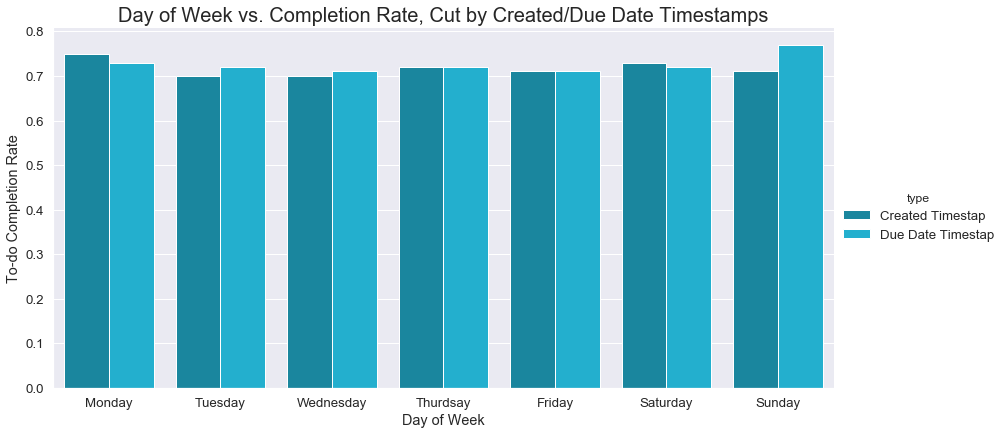

In [22]:
#Create grouped barchart visual
plt.figure(figsize = (15,10))
sns.catplot(x= 'day_of_week', y = 'completion_rate', hue = 'type', data = combined_outputs, height = 6,
            aspect = 2, kind = 'bar', palette = ['#0494b4', '#07c1ea'])
plt.title('Day of Week vs. Completion Rate, Cut by Created/Due Date Timestamps', 
          fontdict= {'fontsize':20})
plt.xlabel('Day of Week')
plt.ylabel('To-do Completion Rate');